## **Task-2: Supervised Machine Learning with Python and Scikit Learn**
Supervised Machine Learning is one of types of Machine Learning Algorithams in which we have labeled data i.e. we have the output labels,based on these output labels we try to predict the output for unknown inputs.

We deal with two kind of problems in supervised learning 1)Regression and 2)Classification.

In Regression problems, we have the continous values as output while in classification, we have classes as our output('good' or 'bad' etc).

There are many supervised regression as well as classification algorithams out there.

Here,in this section we are going to see how linear regression algorithm works in regression problem using scikit_learn library for Machine Learning.

## Linear Regression ##
Our task is to visualise the relationship between hours fo study and percentage scores obtained.And then to predict the score where study hour is 93.5 hour.This is a simple linear regression task with two variables.
linear regression uses the equation: Y=MX+C, where x is our feature and y is our target variable.

In [6]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('Hours_Scores.csv')
print('Importing data')

Importing data


In [5]:
## taking a glance at data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
## checking the shape
df.shape

(25, 2)

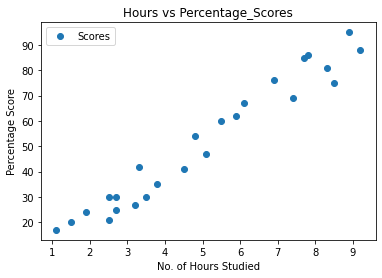

In [27]:
# Plotting the distribution of scores with respect to hours
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

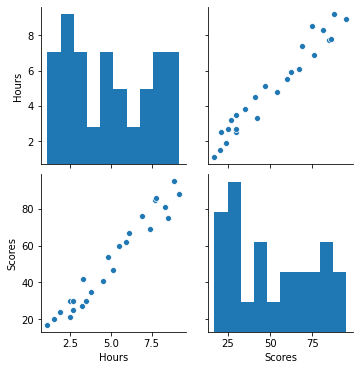

In [10]:
sns.pairplot(df)

Here the hours and scores have linear relationship between them.

<AxesSubplot:xlabel='Scores'>

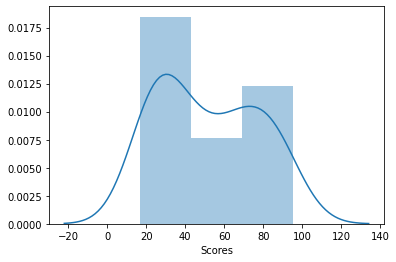

In [11]:
## checking the distribution of scores weather it is guassian or not
sns.distplot(df['Scores'])


The distribution of our scores is not perfect guassian.But as we have less data it will not affect our performance much.Hence, no applying normalization or scaling.

## Preparing the data
The data contains two variables one is our dependent variable(Hour) and other is independent variable or label(Scores). So we will assign them as their designation.

In [9]:
## getting location of feature values and target 
X = df.iloc[:,:-1].values ##all the rows of all columns except the last column as that is our label
y = df.iloc[:,1].values   ##the label column with all of its rows

Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
## splitting the data into train and test for checking our model
from sklearn.model_selection import train_test_split  
x_train, x_valid, y_train, y_valid = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## creating and training our model
We have data for training and testing. Now we will first train our linear regression model on train dataset then will test on test dataset.

In [77]:
##importing our model and fitting to the training dataset
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(x_train,y_train)
print('Training Completed')

Training Completed


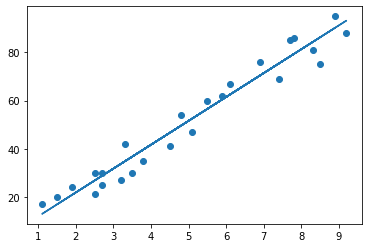

In [78]:
# Plotting the regression line
line = lgr.coef_*X+lgr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making prediction 

We have trained our model using training dataset. Now we will predict the outputs on test dataset using the trained model.

In [79]:
##testing the model by making prediction on our test dataset
y_prediction = lgr.predict(x_valid)

## Performance Evaluating
We have predicted the outputs on our test dataset. Now is the time to evaluate the performance of our model using r2_score, mean_squared_error and mean_absolute_error.
We will import these metrices from scikit_learn library.

In [81]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score = r2_score(y_prediction,y_valid)
mse = mean_squared_error(y_prediction,y_valid)
mae = mean_absolute_error(y_prediction,y_valid)

print('r2_score: {}'.format(score))
print('mean_squared_error: {}'.format(mse))
print('Mean Absolute Error:',mae)

r2_score: 0.9546785947197246
mean_squared_error: 21.598769307217456
Mean Absolute Error: 4.183859899002982


We have got the quite good performance using this simple linear regression model.

In [82]:
# Comparing Actual vs Predicted after combining them into a dataframe
df_label = pd.DataFrame({'Actual': y_valid, 'Predicted': y_prediction})  
df_label

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


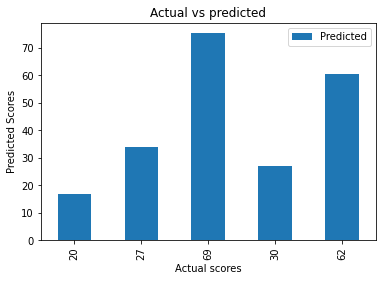

In [83]:
# Plotting the prediction with actual values
df_label.plot(x='Actual', y='Predicted',kind = 'bar')  
plt.title('Actual vs predicted')  
plt.xlabel('Actual scores')  
plt.ylabel('Predicted Scores')  
plt.show()

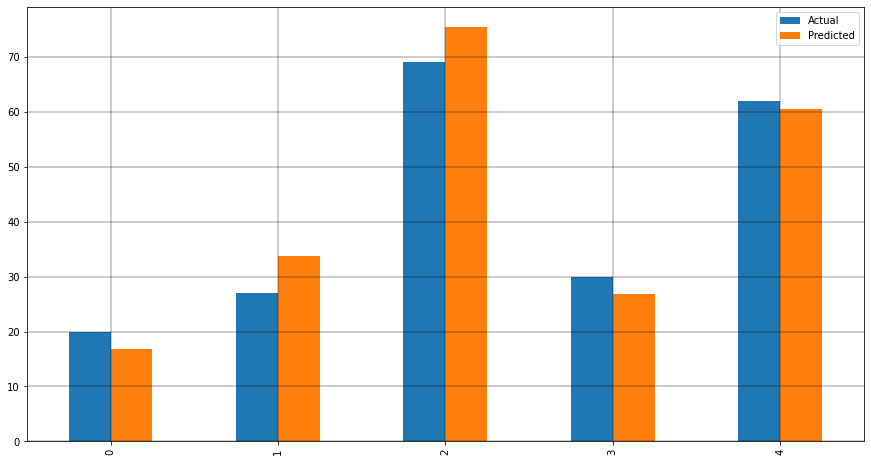

In [84]:
# We can also visualize comparison result as a bar graph
df1 = df_label.head()
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()

<AxesSubplot:>

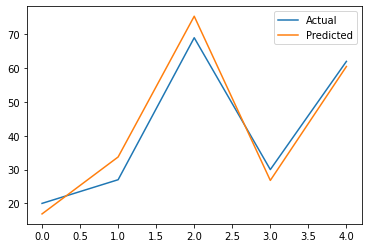

In [85]:
df_label.plot()

## Predicting score 

Now we will be predicting the scores with respect to 9.25 hours of study using our trained model.

In [52]:
hour = [[9.25]]
pred_score = lgr.predict(hour)
print('hour_studied: {}'.format(hour))
print('Score_prediced: {}'.format(pred_score))

hour_studied: [[9.25]]
Score_prediced: [93.69173249]


Finally, our hard work paid off! We have studied for 9.25 hours daily and got a good score of 93.69%.

## Lasso Regularization Model

In [11]:
## Training lasso regularization model
from sklearn.linear_model import Lasso 
lsr = Lasso()
lsr.fit(x_train, y_train)

Lasso()

In [12]:
# making prediction using lasso
lsr_preds = lsr.predict(x_valid)

In [14]:
## Evaluating performance of lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(lsr_preds, y_valid)
mae_lsr = mean_absolute_error(lsr_preds, y_valid)
r2, mae_lsr

(0.9555406456887037, 3.9915771073417106)

In [15]:
# making final prediction using lasso
hour = [[9.25]]
pred_score_lsr = lsr.predict(hour)
print('hour_studied: {}'.format(hour))
print('Score_prediced: {}'.format(pred_score_lsr))

hour_studied: [[9.25]]
Score_prediced: [93.04269714]


In [16]:
## Comparing result with actual 
check=pd.DataFrame({'Actual':y_valid,'Predicted':lsr_preds})
check.reset_index(drop=True,inplace=True)
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,17.489479,2.510521
1,27,34.062443,7.062443
2,69,75.007413,6.007413
3,30,27.238282,2.761718
4,62,60.384210,1.615790


Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Lasso)')

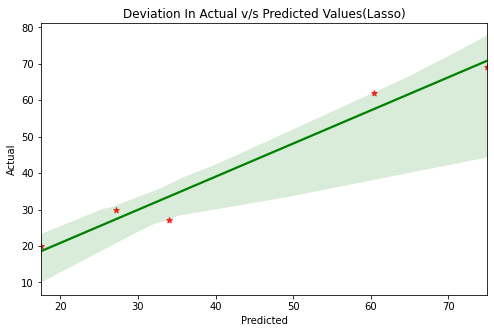

In [17]:
## Visualiazing deviation between actual vs predicted values
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Lasso)')

## Ridge Regularization Model

In [65]:
## training ridge regularization
from sklearn.linear_model import Ridge

rgr=Ridge(alpha = 10)
rgr.fit(x_train,y_train)

Ridge(alpha=10)

In [66]:
## making predictions using ridge
rgr_preds = rgr.predict(x_valid)

In [67]:
## evaluating ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_rgr = r2_score(rgr_preds, y_valid)
mae_rgr = mean_absolute_error(rgr_preds, y_valid)
r2_rgr, mae_rgr

(0.952886392949442, 3.3023718255869667)

In [68]:
## comparing ridge results with actual label
check=pd.DataFrame({'Actual':y_valid,'Predicted':rgr_preds})
check.reset_index(drop=True,inplace=True)
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,19.659200,0.340800
1,27,35.245927,8.245927
2,69,73.754312,4.754312
3,30,28.827863,1.172137
4,62,60.001318,1.998682


Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Lasso)')

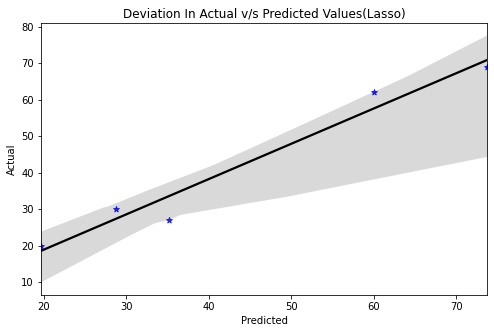

In [70]:
## visualizing daviation betwwn actual vs predicted labels
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'black'},scatter_kws={'color':'blue'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Ridge)')

## Using ElasticNet Model

In [71]:
## Training elastic net model
from sklearn.linear_model import ElasticNet
els_net=ElasticNet(alpha=1)
els_net.fit(x_train,y_train)

ElasticNet(alpha=1)

In [72]:
## making prediction using elasticnet
els_preds = els_net.predict(x_valid)

In [73]:
## evaluating elastic_net
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_els = r2_score(els_preds, y_valid)
mae_els = mean_absolute_error(els_preds, y_valid)
r2_els, mae_els

(0.9517688406051784, 3.213428366075715)

In [74]:
## comapring elastic_net predictions with actual labels
check=pd.DataFrame({'Actual':y_valid,'Predicted':els_preds})
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,19.939207,0.060793
1,27,35.398658,8.398658
2,69,73.592597,4.592597
3,30,29.033002,0.966998
4,62,59.951905,2.048095


Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(ElasticNet)')

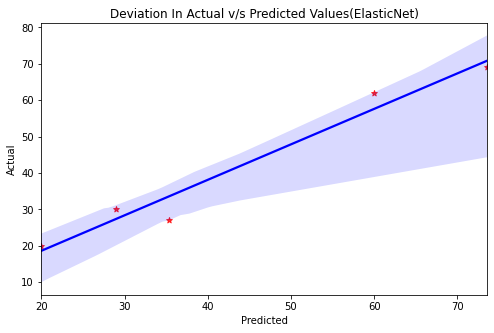

In [76]:
## visualizinng daviation between actual and predicted labels
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'blue'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(ElasticNet)')

## Comparing All Models

In [86]:
## Comparing all the models prediction altogether with actual outputs
final=pd.DataFrame()
errs=[mae_lsr, mae_rgr, mae_els]
final['Valid']=y_valid
final['LinearRegression']=y_prediction
final['Lasso']=lsr_preds
final['Ridge']=rgr_preds
final['ElasticNet']=els_preds


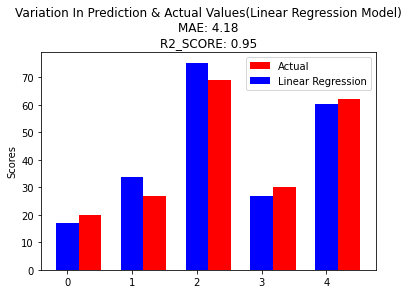

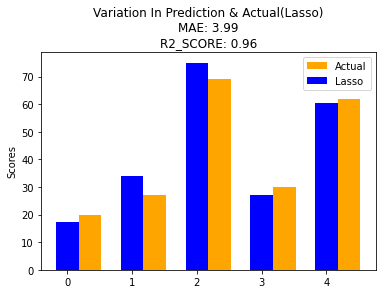

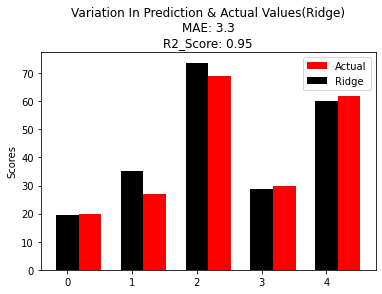

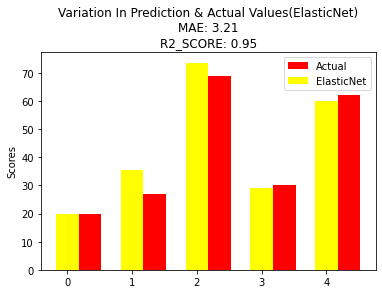

In [89]:
## plotting all the model's results to see best fitted model
N=np.arange(5)
plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,y_prediction,width=0.35,label='Linear Regression',color='blue')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Linear Regression Model)\nMAE: {}\nR2_SCORE: {}'.format(mae.round(2),score.round(2)))
plt.legend(loc='best')
plt.show()

plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='orange')
plt.bar(N,lsr_preds,width=0.35,label='Lasso',color='blue')
plt.title('Variation In Prediction & Actual(Lasso)\nMAE: {}\nR2_SCORE: {}'.format(mae_lsr.round(2),r2.round(2)))
plt.ylabel('Scores')
plt.legend(loc='best')
plt.show()


plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,rgr_preds,width=0.35,label='Ridge', color = 'black')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Ridge)\nMAE: {}\nR2_Score: {}'.format(mae_rgr.round(2),r2_rgr.round(2)))
plt.legend(loc='best')
plt.show()

plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,els_preds,width=0.35,label='ElasticNet',color='yellow')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(ElasticNet)\nMAE: {}\nR2_SCORE: {}'.format(mae_els.round(2),r2_els.round(2)))
plt.legend(loc='best')
plt.show()


Clearly, Elastic net model is giving the relatively most accurate output with least mean_absolute error. So, We Finalize Model 4!



## Making Prediction Using Finalized Model 

In [90]:
n=float(input())
result=els_net.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [90.42]


## Saving the model for future predictions

In [91]:
import pickle 
# Saving model to disk
pickle.dump(els_net, open('model.pkl','wb'))  ## writting as model.pkl



In [94]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))   
print(model.predict([[9.25]]))  ## making prediction using saved model

[90.41611763]


We have got a decent percentage score after going through diferent-different models.

# THANKS!